- Cardiovascular diseases (CVDs) is the no.1 causes of human death worldwide according to [pmc article](https://pmc.ncbi.nlm.nih.gov/articles/PMC10809869/).

- Dataset is taken from [Kaggle](https://www.kaggle.com/datasets/neurocipher/heartdisease).

- The goal is to implement reguarized logistic regression model with the use of prebuild libraries (sklearn) to accuracy predict heart disease in a patent. 


In [2]:
# Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# SKlearn library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### Step 1: Data preprocessing

In [3]:
# Read dataset file
df = pd.read_csv("data.csv")
df.head(5)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
# check for any NaN values
df.isna().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [5]:
# Convert Heart Disease into 1 (presence) and 0 (Absence).
df['Heart Disease'] = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})
df.head(5)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [6]:
correlation_matrix = df.corr()
print(correlation_matrix['Heart Disease'].sort_values(ascending=False))

Heart Disease              1.000000
Thallium                   0.525020
Number of vessels fluro    0.455336
Exercise angina            0.419303
ST depression              0.417967
Chest pain type            0.417436
Slope of ST                0.337616
Sex                        0.297721
Age                        0.212322
EKG results                0.182091
BP                         0.155383
Cholesterol                0.118021
FBS over 120              -0.016319
Max HR                    -0.418514
Name: Heart Disease, dtype: float64


- From the correlation matrix: it seems when "FBS over 120" or "Max HR increases", the lesser chance of heart disease occuring in a person. Also, "Thallium" seems to be the most critual factor of causing heart disease in a person. 

C:\Users\lone7\AppData\Local\Temp\ipykernel_12540\1334919867.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([survived_0, survived_1], labels=['No Heart Disease', 'Heart Disease'])


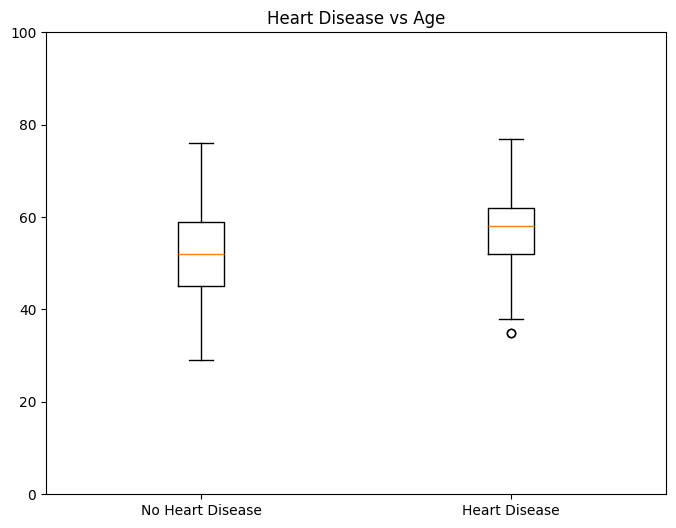

In [7]:
# Boxplot for check for any outliers 
fig, ax=plt.subplots(1,figsize=(8,6))
survived_0 = df[df['Heart Disease'] == 0]['Age']  # Ages of those who did not survive
survived_1 = df[df['Heart Disease'] == 1]['Age']  # Ages of those who survived


ax.boxplot([survived_0, survived_1], labels=['No Heart Disease', 'Heart Disease'])
ax.set_ylim(0,100)
ax.set_ylabel= 'Age'
plt.title("Heart Disease vs Age")
plt.show()

- There is only 1 outlier age in heart disease. Since the age is realistic, we keep this data. 

In [8]:
# Feature and target
X = df.drop('Heart Disease', axis=1) # Include all columns except heart disease
y = df['Heart Disease'] # include heart disease column only

In [9]:
# Split data 80/20
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [10]:
# Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std  = scaler.transform(X_test)

#### Step 2: Train model

- To identify the optimal value of C that maximizes model's prediction accuracy, use GridSearchCV.

    - It runs the entire grid search over predefined C values using cross-validation.

    - It finds the value of C that yields the best cross-validated performance.

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "C": [0.01, 0.1, 1, 10, 100]
}

grid = GridSearchCV(
    LogisticRegression(
        penalty="l2", 
        solver="liblinear",
        max_iter=1000
    ),
    param_grid,
    cv=5,
    scoring="accuracy"
)

grid.fit(X_train_std, y_train)

best_model = grid.best_estimator_

print("Best C:", grid.best_params_)

y_test_pred = best_model.predict(X_test_std)
print("Optimized Test Accuracy:", accuracy_score(y_test, y_test_pred))

Best C: {'C': 0.1}
Optimized Test Accuracy: 0.8518518518518519


- c best optimal value is 0.1. 

In [18]:
# Regularized Logistic Regression
model = LogisticRegression(
    penalty="l2",          # L2 regularization (ridge)
    C=0.1,                 # inverse regularization strength
    solver="liblinear",    # stable for small datasets
    max_iter=1000,
    random_state=42
)

In [13]:
model.fit(X_train_std, y_train)

LogisticRegression(C=0.1, max_iter=1000, random_state=42, solver='liblinear')

#### Step 3: Evaluation

In [14]:
y_train_pred = model.predict(X_train_std)
y_test_pred  = model.predict(X_test_std)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc  = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy:  {test_acc:.4f}")

print("\nConfusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))

Train Accuracy: 0.8519
Test Accuracy:  0.8519

Confusion Matrix (Test):
[[24  6]
 [ 2 22]]

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        30
           1       0.79      0.92      0.85        24

    accuracy                           0.85        54
   macro avg       0.85      0.86      0.85        54
weighted avg       0.86      0.85      0.85        54



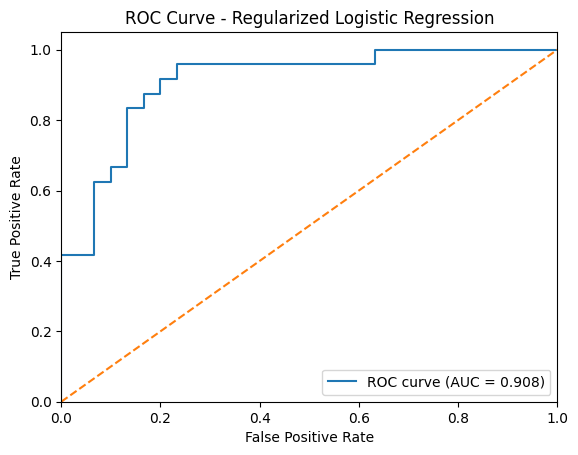

In [15]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_test_proba = best_model.predict_proba(X_test_std)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Regularized Logistic Regression")
plt.legend(loc="lower right")
plt.show()

- In conlcusion, we have a test accuracy of 85.19% build with SKlearn library, which is higher than our classical build model (79.64%).

- As seen from the ROC curve graph, AUC is at 0.91 which is excellent at predicting heart disease. 